In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!ln -s /content/drive/My\ Drive/ /mydrive

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('/content/drive/My Drive/ManojSirIntern/data_final.csv')

In [5]:
df.drop(['Unnamed: 0'],axis =1,inplace=True)

In [6]:
Y = df['OutPut']
df.drop(['OutPut'],axis=1,inplace=True)

In [7]:
Y

0        1
1        1
2        1
3        1
4        1
        ..
33836    0
33837    0
33838    0
33839    0
33840    0
Name: OutPut, Length: 33841, dtype: int64

In [8]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,13.130,26.260,22.87,22.43,25.28,21.17,20.44,20.68,21.14,20.16,...,20.89,11.85,2.460,7.58,18.84,9.770,9.070,8.960,5.240,10.610,10.840,19.13,18.000,15.950,5.26,8.35,10.230,10.08,11.62,12.320,12.18,20.89,7.07,6.31,8.56,10.48,8.20,12.53,7.90,8.580,10.12,9.960,16.92,7.600,27.161,18.05,26.47,18.75,17.84,14.920
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.00,0.00,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.000,0.000,0.00,0.00,0.00,0.00,0.000
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.00,0.00,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.000,0.000,0.00,0.00,0.00,0.00,0.000
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.035,2.070,0.91,1.09,1.64,1.39,1.02,0.64,0.88,0.98,...,20.11,20.07,22.940,16.58,19.33,27.960,27.210,19.060,25.770,27.960,24.920,27.96,17.430,25.550,19.04,13.19,13.990,14.21,10.72,15.850,13.39,27.01,12.06,14.43,17.30,16.95,8.25,22.76,14.07,20.700,6.50,9.990,11.78,18.590,26.800,18.57,14.59,12.82,19.37,15.920
4,2.90,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,0.85,0.88,5.64,3.81,6.51,9.19,7.79,7.02,7.25,6.37,6.43,7.89,7.46,6.99,7.95,7.59,3.32,3.61,5.35,4.73,3.68,3.530,10.780,8.84,8.37,7.91,7.96,7.45,5.33,6.46,6.61,...,14.06,10.07,20.109,8.26,15.98,20.109,20.109,20.109,20.109,20.109,20.109,16.12,12.870,14.660,9.08,8.89,14.260,0.00,0.00,4.980,9.96,11.13,10.07,9.75,9.56,9.48,10.60,10.06,10.79,10.910,17.77,10.370,15.32,13.510,12.230,14.68,16.35,18.14,18.41,17.310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33836,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,39.935,79.87,91.87,112.33,95.79,85.45,75.79,69.31,75.96,...,211.53,153.31,246.034,164.94,185.29,246.034,246.034,246.034,246.034,232.290,233.730,224.33,246.034,246.034,187.94,211.95,246.034,0.00,0.00,34.165,68.33,205.65,123.47,121.85,152.39,158.13,229.34,226.53,188.67,246.034,223.88,184.340,172.69,205.440,207.640,233.38,194.74,183.91,182.19,246.034
33837,1.84,1.82,2.26,1.80,1.24,1.69,1.95,1.20,1.29,1.36,2.87,1.30,3.04,2.27,2.83,2.30,1.94,1.58,2.34,2.24,2.66,2.64,1.29,3.92,6.33,1.44,1.86,1.17,1.69,1.73,1.370,0.000,0.00,0.00,0.67,0.00,0.02,0.72,0.72,0.00,...,4.55,6.61,6.680,6.66,7.28,4.570,5.830,8.910,11.330,10.090,11.060,7.56,4.780,6.470,4.79,6.39,5.800,3.38,7.09,6.800,7.91,6.28,4.85,4.03,7.21,6.19,8.97,9.12,9.55,4.820,0.83,4.830,6.50,6.915,7.330,5.83,7.00,5.48,5.16,8.160
33838,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,8.220,2.56,3.46,3.88,3.98,4.12,3.75,

In [9]:
x = np.array(df)
y = np.array(Y)

In [10]:
print(x.shape)
print(y.shape)

(33841, 1034)
(33841,)


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [15]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(27072, 1034)
(27072,)
(6769, 1034)
(6769,)


In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [18]:
y_pred = clf.predict(x_test)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6003
           1       0.50      0.14      0.22       766

    accuracy                           0.89      6769
   macro avg       0.70      0.56      0.58      6769
weighted avg       0.85      0.89      0.86      6769



In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8869847835721673

In [23]:
#Normalised False give no of correctly clasify sample
#Normalised True give percentage accuracy
count = accuracy_score(y_test, y_pred, normalize=False)

In [24]:
print('No of correctly classify sample ',count, ' out of ',len(y_test))


No of correctly classify sample  6004  out of  6769


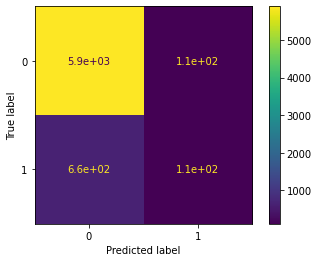

In [25]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, x_test, y_test)
plt.show()

KNN Confusion matrix @80
[[5895  108]
 [ 657  109]]
Normalized confusion matrix
[[0.982009   0.017991  ]
 [0.85770235 0.14229765]]


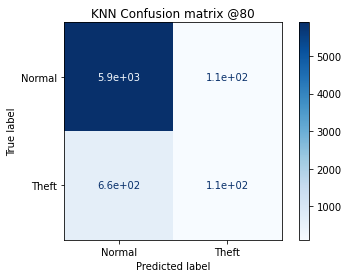

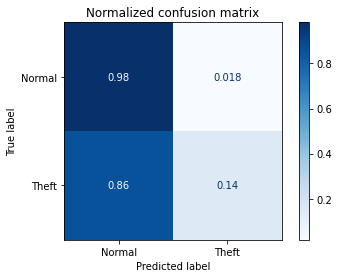

In [26]:
# Plot non-normalized confusion matrix
titles_options = [("KNN Confusion matrix @80", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, x_test, y_test,
                                 display_labels=['Normal','Theft'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

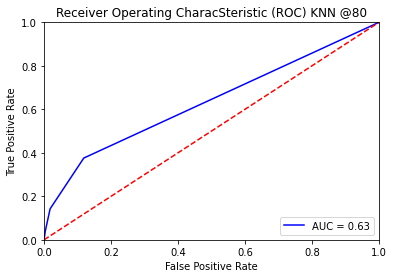

In [27]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating CharacSteristic (ROC) KNN @80')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = # false_positive_rate
y = # true_positive_rate 

# This is the ROC curve
plt.plot(x,y)
plt.show() 

# This is the AUC
auc = np.trapz(y,x)